In [23]:
import pandas as pd
import numpy as np
from statsmodels.stats import proportion
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("marketing_campaign.csv")
df.head(3)

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   variant             10037 non-null  object
 4   language_displayed  10037 non-null  object
 5   converted           10022 non-null  object
dtypes: object(6)
memory usage: 470.6+ KB


### Поиск отсутствующих значений:

#### В силу немногочисленности отсутствующих значений, заменяем их самым популярным вариантом в признаке.

In [4]:
df.loc[df["date_served"].isnull(), "date_served"]

7038    NaN
9944    NaN
9945    NaN
9946    NaN
9947    NaN
9948    NaN
9949    NaN
9950    NaN
9951    NaN
9952    NaN
9953    NaN
9954    NaN
9955    NaN
9956    NaN
9957    NaN
9958    NaN
Name: date_served, dtype: object

In [5]:
df['date_served'].value_counts()

1/15/18    789
1/2/18     417
1/16/18    391
1/3/18     388
1/1/18     375
1/17/18    374
1/31/18    347
1/10/18    342
1/4/18     336
1/27/18    331
1/5/18     331
1/30/18    330
1/28/18    330
1/29/18    328
1/20/18    321
1/18/18    320
1/8/18     319
1/6/18     315
1/9/18     315
1/11/18    314
1/14/18    309
1/13/18    308
1/19/18    308
1/12/18    306
1/7/18     281
1/21/18    234
1/26/18    225
1/24/18    193
1/25/18    186
1/22/18    182
1/23/18    176
Name: date_served, dtype: int64

In [6]:
df.loc[df["date_served"].isnull(), "date_served"] = "1/15/18"

In [8]:
df.loc[df["marketing_channel"].isnull(), "marketing_channel"]

9944    NaN
9945    NaN
9946    NaN
9947    NaN
9948    NaN
9949    NaN
9950    NaN
9951    NaN
9952    NaN
9953    NaN
9954    NaN
9955    NaN
9956    NaN
9957    NaN
9958    NaN
Name: marketing_channel, dtype: object

In [9]:
df['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [10]:
df.loc[df["marketing_channel"].isnull(), "marketing_channel"] = "House Ads"

In [11]:
df.loc[df["converted"].isnull(), "converted"]

9944    NaN
9945    NaN
9946    NaN
9947    NaN
9948    NaN
9949    NaN
9950    NaN
9951    NaN
9952    NaN
9953    NaN
9954    NaN
9955    NaN
9956    NaN
9957    NaN
9958    NaN
Name: converted, dtype: object

In [12]:
df['converted'].value_counts()

False    8946
True     1076
Name: converted, dtype: int64

In [13]:
df.loc[df["converted"].isnull(), "converted"] = False

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   date_served         10037 non-null  object
 2   marketing_channel   10037 non-null  object
 3   variant             10037 non-null  object
 4   language_displayed  10037 non-null  object
 5   converted           10037 non-null  object
dtypes: object(6)
memory usage: 470.6+ KB


### Гипотезы:

нулевая гипотеза: $H_0 : p_1 = p_2$<br>
альтернативная гипотеза: $H_1 : p_1 \neq p_2$

In [15]:
counts = df['converted'].value_counts().tolist()
values = df['converted'].value_counts().keys().tolist()
values, counts

([False, True], [8961, 1076])

In [16]:
z_crit_value = 1.96 # соответствует доверительному интервалу в 95%
k1 = (df[df['converted']==True]['variant'] == 'control').sum()
n1 = df[df['variant'] == 'control'].shape[0]
k2 = (df[df['converted']==True]['variant'] == 'personalization').sum()
n2 = df[df['variant'] == 'personalization'].shape[0]

k1, n1, k2, n2

(371, 5091, 705, 4946)

In [17]:
grouped = df.pivot_table(values='converted', index='variant', aggfunc=['sum', 'count'])
grouped

,sum,count
,converted,converted
variant,,
control,371,5091
personalization,705,4946


In [18]:
p1, p2 = k1/n1, k2/n2
p1, p2

(0.07287369868395208, 0.14253942579862516)

In [19]:
P = (p1*n1 + p2*n2) / (n1 + n2)
z = (p1 - p2) / (P * (1 - P) * (1/n1 + 1/n2))**(1/2)
z

-11.278864170859038

In [34]:
z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), np.array([n1, n2]))
print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=-11.279 pvalue=0.000


In [20]:
if abs(z) > z_crit_value:
    print("Мы можем отвергнуть нулевую гипотезу!")
else:
    print("Мы не можем отвергнуть нулевую гипотезу")

Мы можем отвергнуть нулевую гипотезу!


### Хи-квадрат тест:

In [35]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), np.array([n1, n2]))
print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=127.213 pvalue=0.000


### Т.к. нулевая гипотеза отвергнута, мы можем говорить, что различие имеет статистическую значимость.

### Визуальный анализ:

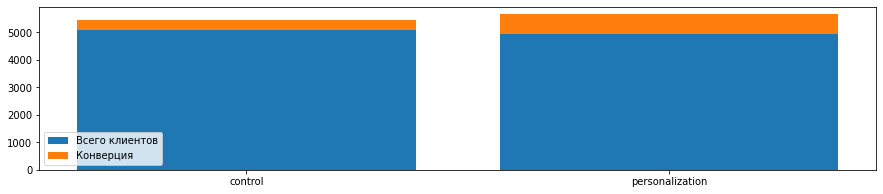

In [33]:
plt.figure(figsize=(15, 3))
plt.bar([1, 2], grouped['count']['converted'], label='Всего клиентов')
plt.bar([1, 2], grouped['sum']['converted'], bottom=grouped['count']['converted'], label='Конверция')
plt.xticks([1, 2], ['control', 'personalization'])
plt.legend();

### При визуальном анализе различия видны невооруженным глазом.